In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler

%matplotlib inline
import math
from qiskit_aer import AerSimulator, QasmSimulator, StatevectorSimulator

In [7]:
qasm_simulator = QasmSimulator()
statevector_simulator = StatevectorSimulator()

In [8]:
def run_on_simulators(circuit):
    circ = transpile(circuit, statevector_simulator)    
    statevec_job = statevector_simulator.run(circ)
    result = statevec_job.result()
    statevec = result.get_statevector()
    
    num_qubits = circuit.num_qubits
    circuit.measure([i for i in range(num_qubits)], [i for i in range(num_qubits)])

    circ = transpile(circuit, qasm_simulator)    
    qasm_job = qasm_simulator.run(circ, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

In [9]:
circuit = QuantumCircuit(2,2)
statevec, counts = run_on_simulators(circuit)

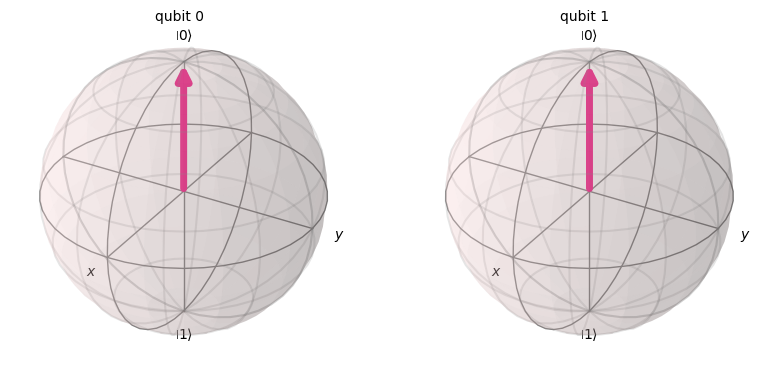

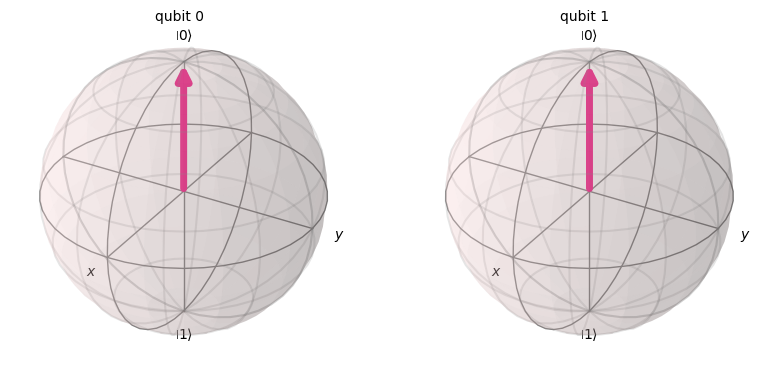

In [10]:
plot_bloch_multivector(statevec)

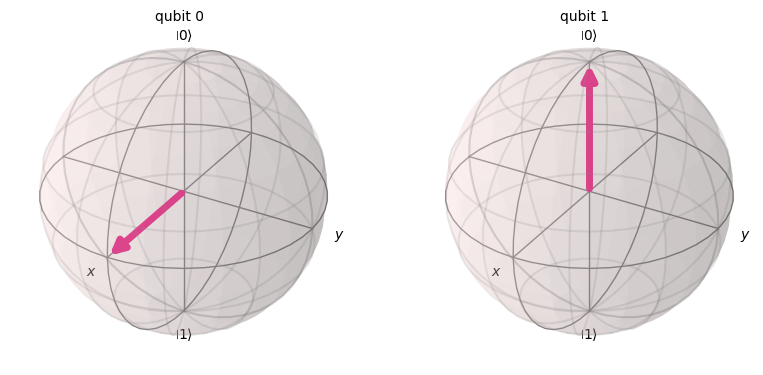

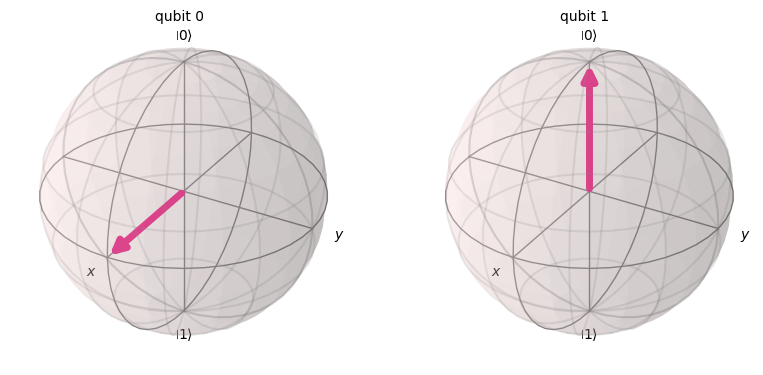

In [11]:
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

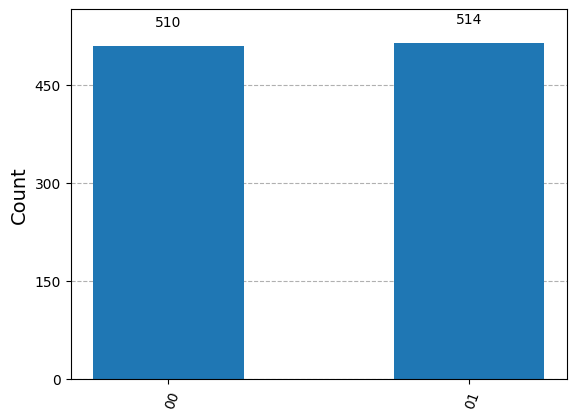

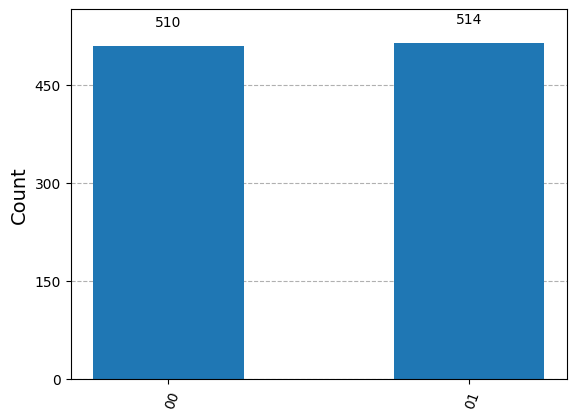

In [12]:
plot_histogram([counts])

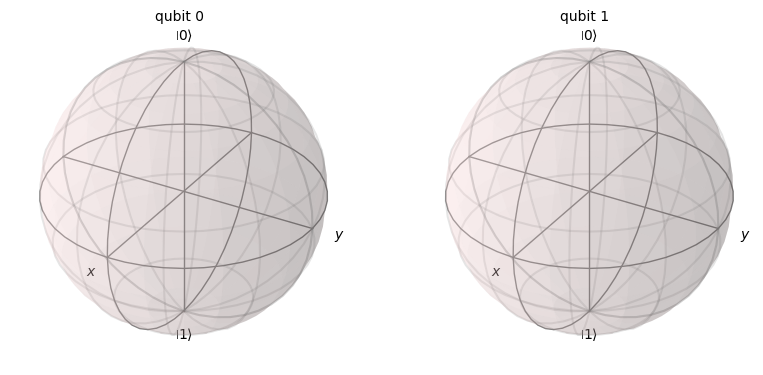

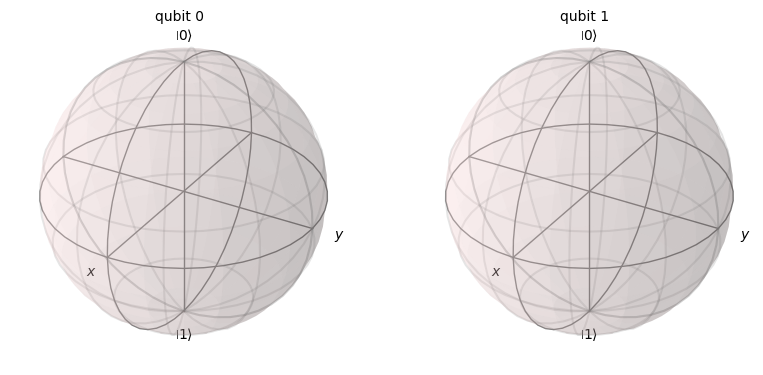

In [13]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

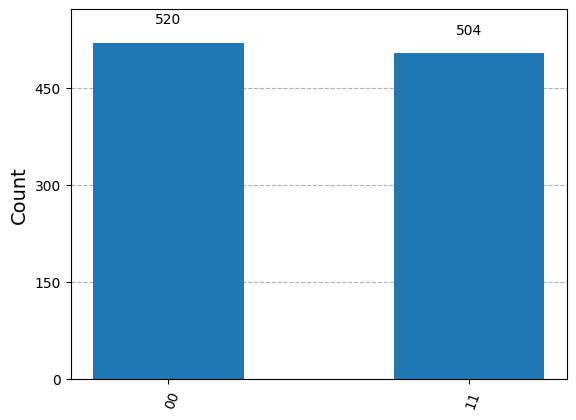

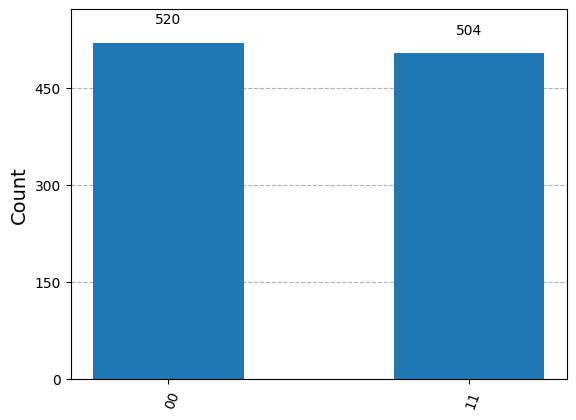

In [14]:
plot_histogram([counts])

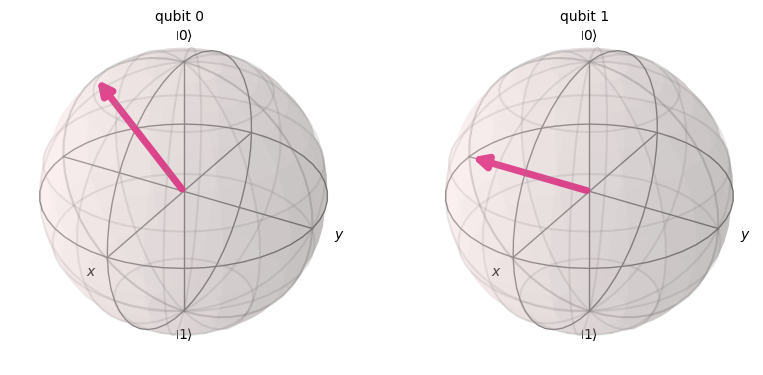

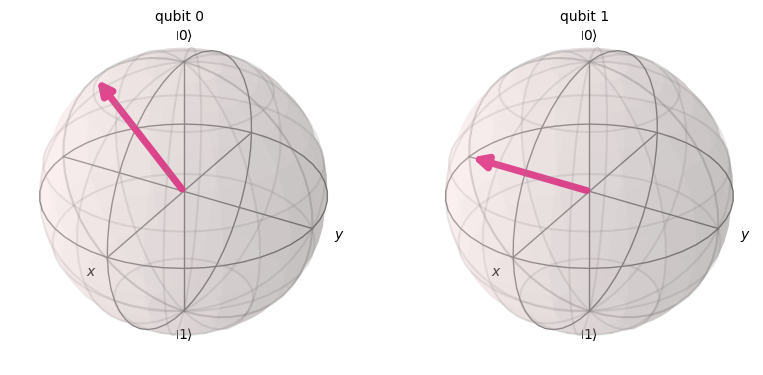

In [15]:
circuit = QuantumCircuit(2,2)
circuit.rx(math.pi/4, 0)
circuit.rx(math.pi / 2, 1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

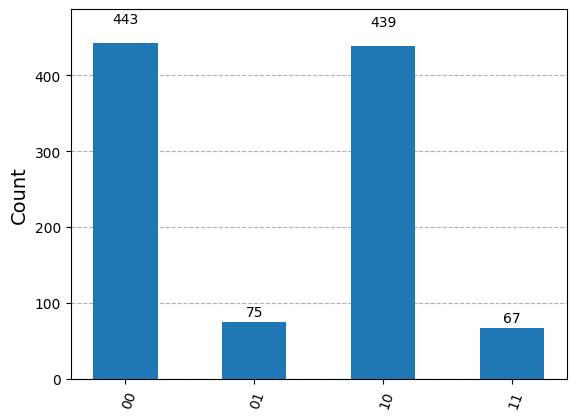

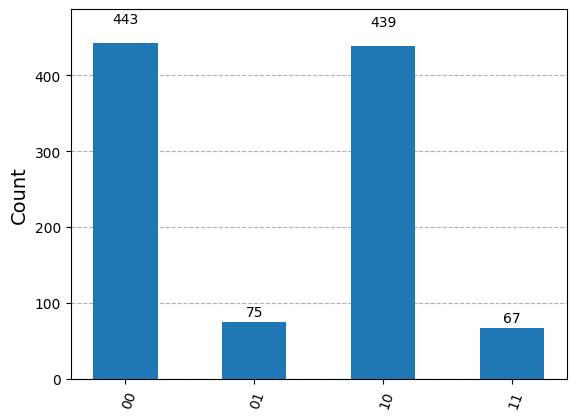

In [16]:
plot_histogram([counts])

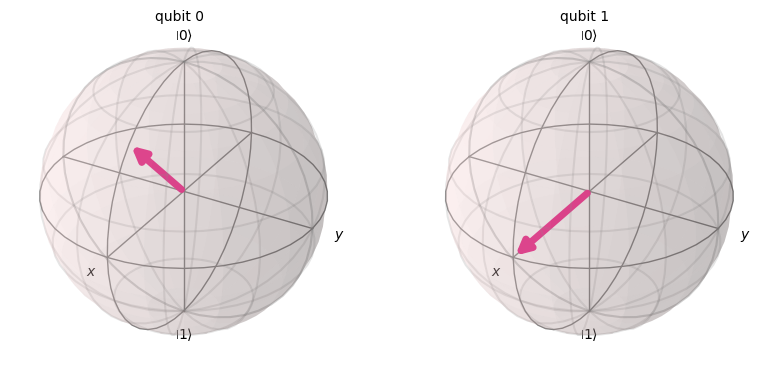

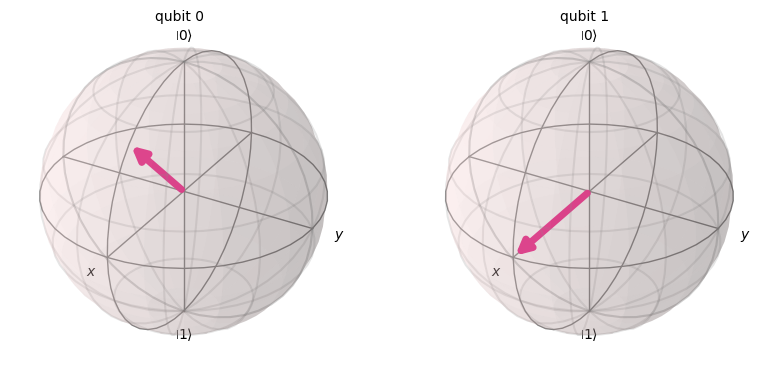

In [17]:
circuit = QuantumCircuit(2,2)
circuit.ry(math.pi/4, 0)
circuit.ry(math.pi / 2, 1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

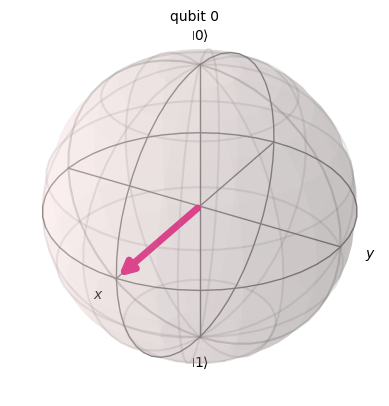

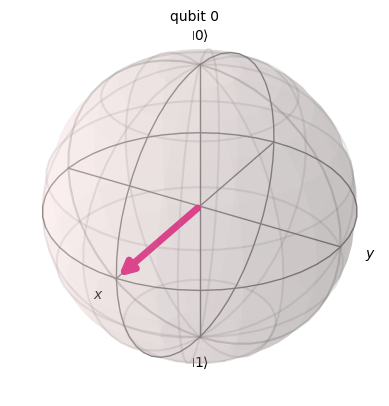

In [18]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

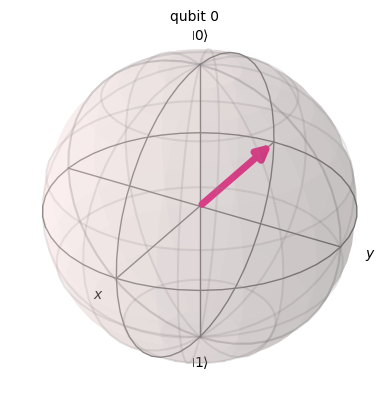

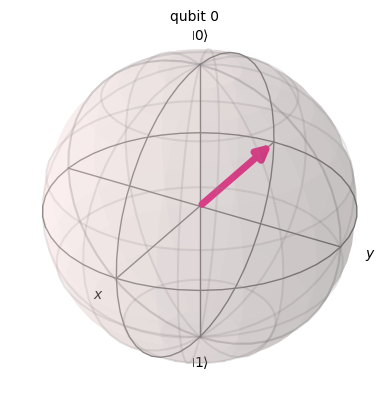

In [19]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.z(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

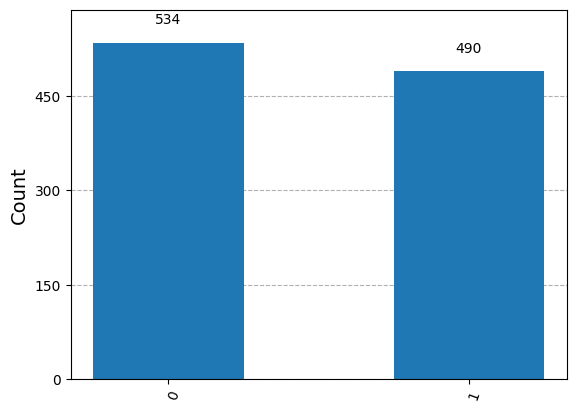

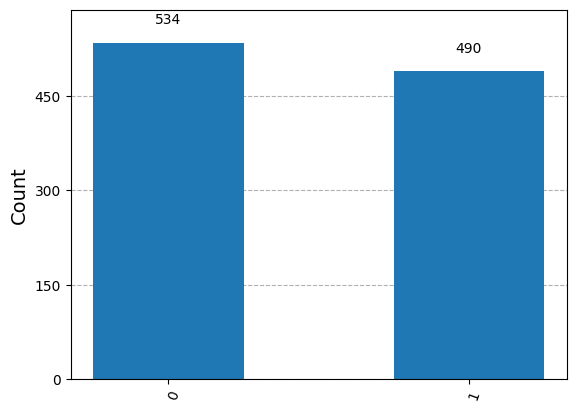

In [20]:
plot_histogram([counts])